In [2]:
import cv2 as cv
import yaml
import matplotlib.pyplot as plt

# Import custom modules
import image_processing

# Read config
with open('./config.yaml', 'r') as f:
    data = yaml.load(f, Loader=yaml.loader.SafeLoader)

# Define constant
FRAME_WIDTH = data['frame_width'][0]
FRAME_HEIGHT = data['frame_height'][0]

In [16]:
def render_video(file_path, file_out):
  # Initialize our video capture.
  video_cap = cv.VideoCapture(file_path)
  if not video_cap.isOpened(): 
    print("Error opening video stream or file")

  # Retrieve video frame properties.
  frame_w   = FRAME_WIDTH
  frame_h   = FRAME_HEIGHT
  frame_fps = int(video_cap.get(cv.CAP_PROP_FPS))

  # Select fourcc encoding for the mp4 file.
  # Having issues? You could also try: *'mp4v' or *'avc1'
  fourcc = cv.VideoWriter_fourcc(*'mp4v')

  # Create the video writer objects.
  vid_out = cv.VideoWriter(file_out, fourcc, frame_fps, (frame_w,frame_h))

  # Run the main loop over every frame of the input video.
  print("Begin processing video... Wait until 'finished' message!")
  while True:
      _, frame = video_cap.read()
      if frame is None:
          print("Finished processing video")
          break
      frame = cv.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))
      result = image_processing.process_image(frame)
      vid_out.write(result)
  # Close the video writer stream.
  vid_out.release()

## Demo with sample image

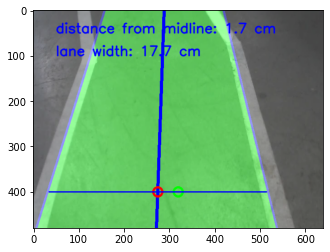

In [3]:
# Sample image
img = cv.imread('./media/images/0023.jpg')
img = cv.resize(img, (FRAME_WIDTH, FRAME_HEIGHT))
lane_detection = image_processing.process_image(img)
plt.imshow(lane_detection[:,:,::-1])

## Demo with sample video

In [4]:
file_path = "./media/videos/demo_video.mp4"
file_out = './media/videos/demo_output.mp4'

# render_video(file_path, file_out)

In [6]:
# Display result video
from IPython.display import HTML

HTML(f"""
    <video width="640" height="480" controls>
        <source src="{file_path}" type="video/mp4">
    </video>
""")

In [5]:
# Display result video
from IPython.display import HTML

HTML(f"""
    <video width="640" height="480" controls>
        <source src="{file_out}" type="video/mp4">
    </video>
""")